# Preprocessing data for ML using the Titanic data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Problem Statement: Based on provided features in the titanic dataset, prepare the data and build a model to predict whether the passenger survived or not (yes/no or 1/0)

In [5]:
file_path = '/Users/DRepani/Documents/AIML-WS/DataSets/titanic.txt'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


|Variable|	Definition	|Key
|--------|--------|--------|
|survival|	Survival	|0 = No, 1 = Yes
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|	Sex	|
|Age|	Age in years	|
|sibsp|	# of siblings / spouses aboard the Titanic	 |
|parch|	# of parents / children aboard the Titanic	|
|ticket|	Ticket number	|
|fare|	Passenger fare|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

#### Additional Notes:
**pclass:** A proxy for socio-economic status (SES)</br>
- 1st = Upper
- 2nd = Middle
- 3rd = Lower 
 
 
**age:** </br>
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 </br>
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson </br>
Some children travelled only with a nanny, therefore parch=0 for them.

### Extract info from Name column based on domain expertise
e.g. certain last names belong to a region in a country

In [6]:
df['Name'].str.split(',').str[0].value_counts()

Name
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

In [7]:
df['Name'].str.split(',').str[0].map({'Braund':'South', 'Heikkinen':'North'})

0      South
1        NaN
2      North
3        NaN
4        NaN
       ...  
886      NaN
887      NaN
888      NaN
889      NaN
890      NaN
Name: Name, Length: 891, dtype: object

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Some columns have int data type, but that doesn't mean they're numerical  They could be categorical and encoded into numbers. e.g. Survived 0 vs 1
- 890 passengers from our sample

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

- We can say that mean Survived is same as the % of people survived which is the sum of 1s/all values : 38.38%
- In Age col:
    - 50% people are in the age group of 20 - 38 (Central 50% of the sample lies between ages 20 and 38)
    - The oldest person on the ship (based on the sample) was 80 yrs old and the youngest was .42 yrs old.
    - we had infants on the ship
- We see a fare of $0. 
    - It could be due to have rows for staff. We need to investigate further.
    - We need to figure out the % of 0 and assess what to do next. It could also be missing values


<Axes: ylabel='Age'>

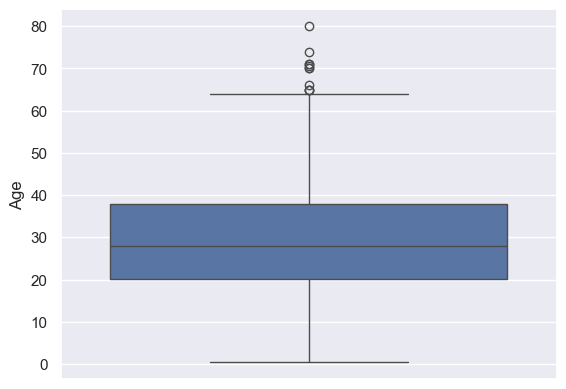

In [11]:
sns.boxplot(y=df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

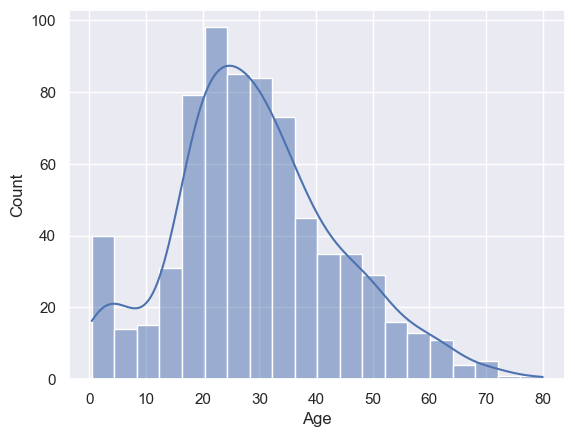

In [12]:
sns.histplot(x=df['Age'], kde=True)

In [13]:
df['Age'].skew()

0.38910778230082704

<Axes: xlabel='Embarked', ylabel='count'>

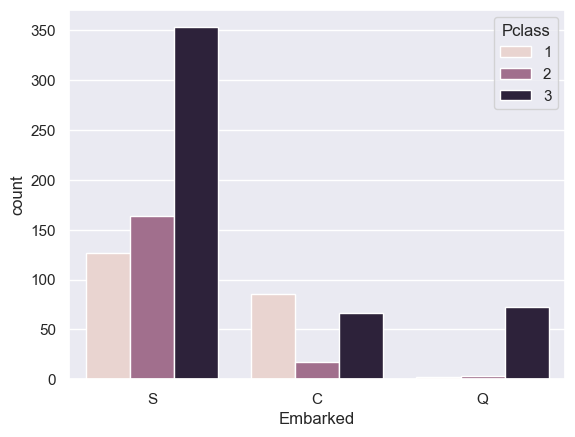

In [14]:

sns.countplot(x=df['Embarked'], hue=df['Pclass']) 

<Axes: xlabel='Embarked', ylabel='count'>

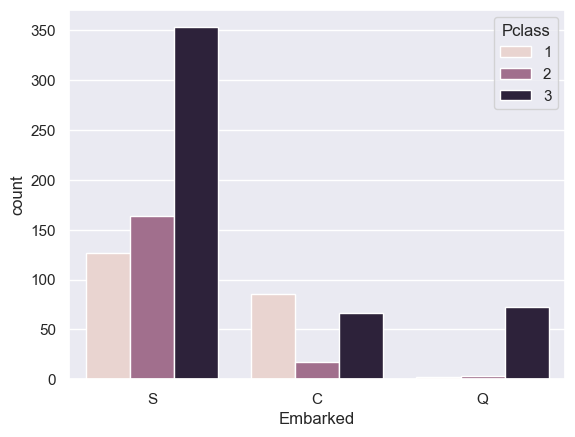

In [15]:
##different syntax/style
sns.countplot(data=df, x='Embarked', hue='Pclass') 

<Axes: ylabel='Survived'>

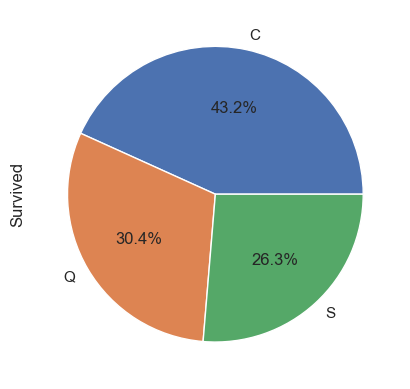

In [16]:
df.groupby('Embarked')['Survived'].mean().plot(kind='pie', autopct='%1.1f%%')

- PClass 3 is most common for S and Q Embarked 
- We have ore 1st class people coming from Embarked = S. 
- For embarked = C, 1st class is the majority

#### Evaluate if young, female, and seniors survived the most

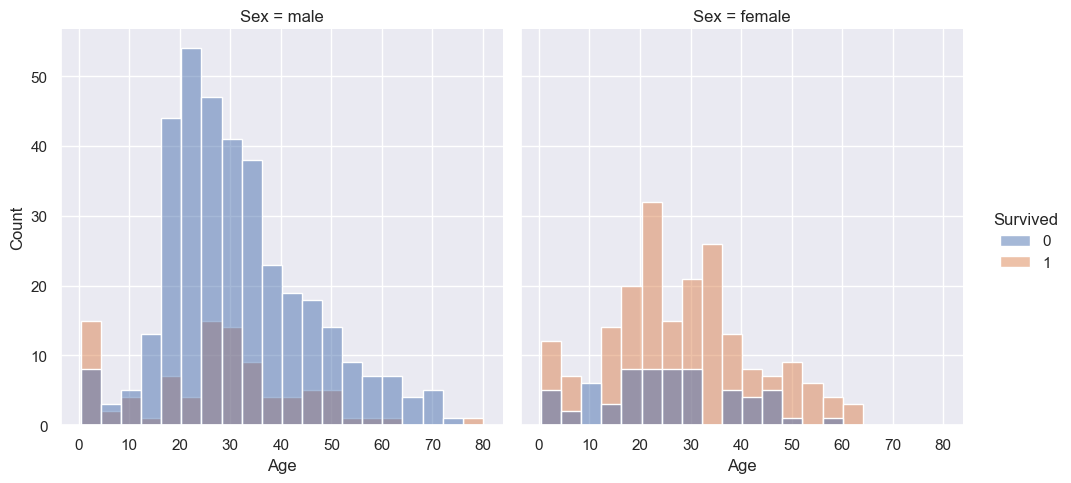

In [17]:
sns.displot(x=df['Age'], col=df['Sex'], hue=df['Survived'])

- From the dist plots, we can see we have more data points for male vs female
- the dist plot comparison:
    - we see that the ratio of survived/not-survived is higher for females across all ages
    - The opposite is true for male, but we can see the exception for infant/child male (more survived than not-survived) 

<Axes: xlabel='Survived', ylabel='count'>

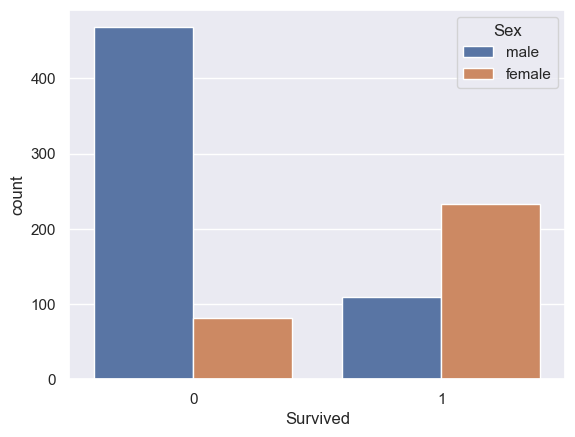

In [18]:
sns.countplot(x=df['Survived'], hue=df['Sex'])

Let's calculate some % of the population
- % survived male
- % survived female
- % survived children between (0-12 yrs old)

In [19]:
total_males = len(df[df['Sex']=='male'])
total_males

577

In [20]:
mask = (df['Sex']=='male') & (df['Survived']==1)
total_surv_males = len(df[mask])
total_surv_males

109

In [21]:
print(f'Percentage of surviving males: {total_surv_males/total_males:.2%}')

Percentage of surviving males: 18.89%


In [22]:
df.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [23]:
val_m = df.groupby('Sex')['Survived'].value_counts(normalize=True)[3]
val_f = df.groupby('Sex')['Survived'].value_counts(normalize=True)[0]

print(f'Percentage of surviving males: {val_m:.2%}')
print(f'Percentage of surviving females: {val_f:.2%}')

Percentage of surviving males: 18.89%
Percentage of surviving females: 74.20%


/var/folders/8w/jtyshgsx74v817csh5jwmrr80000gp/T/ipykernel_13793/481427001.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val_m = df.groupby('Sex')['Survived'].value_counts(normalize=True)[3]
/var/folders/8w/jtyshgsx74v817csh5jwmrr80000gp/T/ipykernel_13793/481427001.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val_f = df.groupby('Sex')['Survived'].value_counts(normalize=True)[0]


In [24]:
# % of survived children

print(f"{(df[df['Age'] <= 12]['Survived'].mean()):.2%} of children survived.")

57.97% of children survived.


In [25]:
total_children = len(df[df['Age'] <= 12])
total_children

69

In [26]:
total_children_surv = len(df[(df['Age'] <= 12) & (df['Survived']==1)])

In [27]:
total_children_surv/total_children

0.5797101449275363

In [28]:
df[df['Age'] <= 12]['Survived'].value_counts(normalize=True)

Survived
1    0.57971
0    0.42029
Name: proportion, dtype: float64

In [29]:
df[df['Age'] <= 12]['Embarked'].value_counts(normalize=True)

Embarked
S    0.782609
C    0.159420
Q    0.057971
Name: proportion, dtype: float64

<Axes: ylabel='Pclass'>

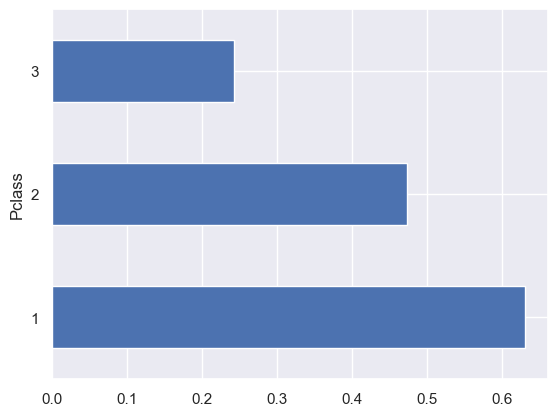

In [30]:
# evaluate if the 1st class people got a special treatment aka survived more than the rest of the classes
df.groupby('Pclass')['Survived'].mean().plot(kind='barh')

## Preprocessing

We need to perform data cleansing and preparation before submitting it to train our ML model:
- Imputation (addressing null values)
- address any possible duplicates 
- Outlier treatment
- Encoding (most important)
- Scaling/normalization
- data split (feature vs target and train vs test)
- Feature selection, extraction, and engineering

### Check for dupes

In [31]:
# check for duplicates
df.duplicated().sum()

0

We have 0 duplicates

In [32]:
df_org = df.copy()

### Encoding

In [33]:
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], dtype=int) # use dtype to convert from boolean to int (note some ML models are ok with just bolean)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


### Imputation

In [35]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64

- Cabin has a large number of nulls, it's almost impossible to fix it. Therefore, we can drop it
- Age has a good num of nulls that can be imputated:
    - it is recommended to use the median instead of the mean because Age is not normally distributed (high skewness)
    - However, before we jump into replacing values with median, we need to check if there's a more sophisticated approach that preserves the relationship between the columns

In [36]:
df[df['Name'].str.contains('Master')]['Name']

7                         Palsson, Master. Gosta Leonard
16                                  Rice, Master. Eugene
50                            Panula, Master. Juha Niilo
59                    Goodwin, Master. William Frederick
63                                 Skoog, Master. Harald
65                              Moubarek, Master. Gerios
78                         Caldwell, Master. Alden Gates
125                         Nicola-Yarred, Master. Elias
159                           Sage, Master. Thomas Henry
164                         Panula, Master. Eino Viljami
165      Goldsmith, Master. Frank John William "Frankie"
171                                 Rice, Master. Arthur
176                        Lefebre, Master. Henry Forbes
182                Asplund, Master. Clarence Gustaf Hugo
183                            Becker, Master. Richard F
193                           Navratil, Master. Michel M
261                    Asplund, Master. Edvin Rojj Felix
278                            

- In the past, they gave male children a title of 'Master', we can use that to get more specific replacement for nulls
- We can get the median on children and then replace where name contains 'Master'

In [37]:
male_child_mean_age = df[df['Name'].str.contains('Master')]['Age'].mean()
male_child_mean_age

4.574166666666667

In [38]:
#we'll stick with a simple approach for now and check if we need to come back for a better approach if the model accuracy is very low
df['Age'].fillna(df['Age'].median(), inplace=True)
#different syntax df['Age'] = df['Age'].fillna(df['Age'].median())

/var/folders/8w/jtyshgsx74v817csh5jwmrr80000gp/T/ipykernel_13793/4008115345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [39]:
df['Age'].isna().sum()

0

In [40]:
df['Cabin'].isna().sum()/len(df)

0.7710437710437711

- We have 77% nulls(missing values) in Cabin column. It's pointless to try to fix this with current data because it will impact the current relationship between the columns.
- Therefore, we can drop the cabin column
- Another approach to save the cabin col is to do research on the relationship between fare price, class, and cabin sections and see if we can replace the values appropriately.

## Binning

- grouping into ranges (data bucketing )
- you can take a continuous variable and make it categorical

In [41]:
df['Age'].value_counts(bins=6)

(26.947, 40.21]     422
(13.683, 26.947]    248
(40.21, 53.473]     100
(0.339, 13.683]      71
(53.473, 66.737]     43
(66.737, 80.0]        7
Name: count, dtype: int64

In [42]:
#cut function is the best way to go
df['AgeBins'] = pd.cut(df['Age']
                       , bins=[0, 12, 18, 65, 99] # ranges specified in a sequential list
                       , labels=[1, 2, 3, 4] #using numerical values instead of text to avoid an additional step for categorical encoding
                       , )

In [43]:
df['AgeBins'].unique()

[3, 1, 2, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

## Feature Extraction

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'AgeBins'],
      dtype='object')

Using SibSP and Parch columns we can get Family Member Count

In [45]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

We can also create another indicator that specifies if the person was boarding alone or not

In [46]:
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

<Axes: ylabel='IsAlone'>

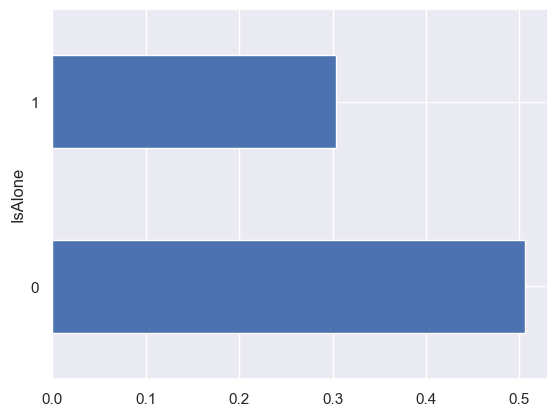

In [47]:
df.groupby('IsAlone')['Survived'].mean().plot(kind='barh')

- It seems the percentage of people with family survived more
- that's probably because not being alone means you are more likely to be a woman or child

### Feature Selection

Now that we have an idea about all the necessary columns, let's drop the ones that are unnecessary 

In [48]:
df = df.drop(['PassengerId', 'Name', 'SibSp',
       'Parch', 'Cabin', 'Ticket'], axis=1)

In [49]:
df.head()

,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,AgeBins,FamilySize,IsAlone
0,0,3,22.0,7.2500,0,0,1,0,1,3,2,0
1,1,1,38.0,71.2833,1,0,0,1,0,3,2,0
2,1,3,26.0,7.9250,0,0,1,1,0,3,1,1
3,1,1,35.0,53.1000,0,0,1,1,0,3,2,0
4,0,3,35.0,8.0500,0,0,1,0,1,3,1,1


In [50]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'AgeBins', 'FamilySize',
       'IsAlone'],
      dtype='object')

## Feature vs Target Split

- Designate X (independent variables or features) and y (dependent variable or target)
- Having X and y split is useful for our ML model
- in short, the ML model we'll train on X to predict y

In [51]:
#method 1
X = df[[ 'Pclass', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'AgeBins', 'FamilySize',
       'IsAlone']]

In [52]:
#method 2 - process by elimination
X = df.drop(['Survived'], axis=1)
X.head()

,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,AgeBins,FamilySize,IsAlone
0,3,22.0,7.2500,0,0,1,0,1,3,2,0
1,1,38.0,71.2833,1,0,0,1,0,3,2,0
2,3,26.0,7.9250,0,0,1,1,0,3,1,1
3,1,35.0,53.1000,0,0,1,1,0,3,2,0
4,3,35.0,8.0500,0,0,1,0,1,3,1,1


In [53]:
# split for y
y = df['Survived']

### Normalization vs Standardization
- Data scaling is recommended for ML preprocessing
- It ensures that features are within a common range
- it ensures that there are no features dominating others in the ML processing
- There's no definite rule to which technique is better, but here are a few factors to consider:

| Comp Cat | Normalization | Standardization |
| ----- | ----- | ----- |
| SKLearn Method | MinMaxScaler() | StandardScaler()|
| Range | Scales the data to a  fixed range between 0 and 1 | Scales the data with a mean = 0 and std = 1 |
| Recommendation | Good for datasets with a large range of values and lack normal distribution. In most cases it's ideal for Neural Networks | good for datasets with normal distribution or regression-based models | 

In [60]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X) #this converts the df into a numpy array
X_scaled

array([[1.        , 0.27117366, 0.01415106, ..., 0.66666667, 0.1       ,
        0.        ],
       [0.        , 0.4722292 , 0.13913574, ..., 0.66666667, 0.1       ,
        0.        ],
       [1.        , 0.32143755, 0.01546857, ..., 0.66666667, 0.        ,
        1.        ],
       ...,
       [1.        , 0.34656949, 0.04577135, ..., 0.66666667, 0.3       ,
        0.        ],
       [0.        , 0.32143755, 0.0585561 , ..., 0.66666667, 0.        ,
        1.        ],
       [1.        , 0.39683338, 0.01512699, ..., 0.66666667, 0.        ,
        1.        ]])

In [55]:
type(X_scaled)

numpy.ndarray

### Final Step in Preprocessing: Splitting Data Into Train vs Test

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y
                                                    , test_size=0.2 #80:20 for train-test split (by default it uses 75:25)
                                                    , random_state=10 #the randomness metric. used to generate exact split 
                                                    )

- At last, we're ready to build and train our model
- Since our target is a call/categorical, we need to use classification ML algorithms. e.g. LogisticRegression
- Although the name says regression, LogisticRegression can be used for classification problems

In [57]:
from sklearn.linear_model import LogisticRegression

#create the model instance
model = LogisticRegression() #inside the paraentheses you can apply hyperparameters - if you leave blank, it'll use the default parameters


In [58]:

#train the model (fit)
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
# evaluate the model - mean accuracy score
score = model.score(X_test, y_test)
print('Model Accuracy:',round(score*100,2),'%')

Model Accuracy: 83.8 %


- We have 83.8% accuracy, which is "ok":
    - 90% or higher generally considered great performance
    - between 80 and 90% ok or accceptable
    - between 70 and 80 % acceptable  or not enough
    - below 70% poor performance
- To improve the accuracy of the model we can do the following:
    - improve our feature engineering
    - collect more data
    - outlier treatment
    - Hyperparameter tuning (experiment with different parameters in the data)
    - experiment with different models. LR may not be the best for this data